In [1]:
import random
import numpy as np
import cv2

lab_boundaries = [([190, 120, 138], [240, 138, 177])]
[(lower,upper)] = lab_boundaries
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")

fourcc = cv2.VideoWriter_fourcc(*'XVID')

cap = cv2.VideoCapture('day2_lane1/0.jpg')
frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('test.avi', fourcc, 30.0,(frame_width,frame_height))

def main():
    """main fuction
    """
    i = 0
    while i < 1000:
        fname = 'day2_lane1/' + str(i) + '.jpg'
        
        original = cv2.imread(fname, cv2.IMREAD_COLOR)
        original = cv2.bilateralFilter(original,9,75,75)
        lab_image = cv2.cvtColor(original, cv2.COLOR_BGR2LAB)

        mask = cv2.inRange(lab_image, lower, upper)
        output = cv2.bitwise_and(lab_image, lab_image, mask=mask)

            # show the images
        image_name = str(i)
#         cv2.imshow("lab " + " " + str(i),
#                     np.hstack([original, output]))
        out.write(output)
        i = i+1
#         c=cv2.waitKey(0)
        
#     cv2.destroyAllWindows()
    out.release()



if __name__ == '__main__':
    main()

In [3]:
i = 0
str(i)

'0'

In [22]:
frame_width

600

In [10]:
from matplotlib import pyplot as plt
cap = cv2.imread('day2_lane1/63.jpg')
cap=cv2.Canny(cap,100,200)

In [4]:
# cap = cv2.VideoCapture('test.avi')
# _,frame = cap.read()
# frame = cv2.Canny(frame,100,200)

In [11]:
# Show plot
r_lane = cap

# http://stackoverflow.com/a/29799815/1698058
# Get index of matching value.
def find_first(item, vec):
    """return the index of the first occurence of item in vec"""
    for i in range(len(vec)):
        if item == vec[i]:
            return i
    return -1

bounds = [400, 500]
# Now the points we want are the lowest-index 255 in each row
window = r_lane[bounds[1]:bounds[0]:-1].transpose()

xy = []
for i in range(len(window)):
    col = window[i]
    j = find_first(255, col)
    if j != -1:
        xy.extend((i, j))
# Reshape into [[x1, y1],...]
data = np.array(xy).reshape((-1, 2))
# Translate points back to original positions.
data[:, 1] = bounds[1] - data[:, 1]

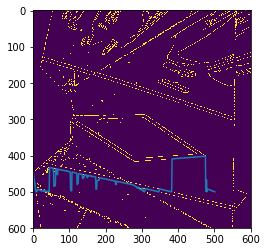

In [7]:
plt.imshow(cap)
plt.plot(data[:,1])

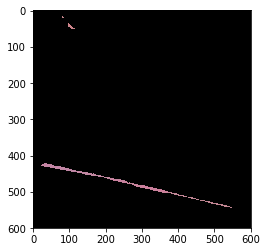

In [16]:
cap = cv2.imread('day2_lane1/63.jpg')
cap = cv2.bilateralFilter(cap,9,75,75)
lab_image = cv2.cvtColor(cap, cv2.COLOR_BGR2LAB)

mask = cv2.inRange(lab_image, lower, upper)
output = cv2.bitwise_and(lab_image, lab_image, mask=mask)
plt.imshow(output)


In [18]:
import copy

capt=copy.deepcopy(output)
capt=cv2.Canny(capt,100,200)
r_lane = capt

# http://stackoverflow.com/a/29799815/1698058
# Get index of matching value.
def find_first(item, vec):
    """return the index of the first occurence of item in vec"""
    for i in range(len(vec)):
        if item == vec[i]:
            return i
    return -1

bounds = [400, 500]
# Now the points we want are the lowest-index 255 in each row
window = r_lane[bounds[1]:bounds[0]:-1].transpose()

xy = []
for i in range(len(window)):
    col = window[i]
    j = find_first(255, col)
    if j != -1:
        xy.extend((i, j))
# Reshape into [[x1, y1],...]
data = np.array(xy).reshape((-1, 2))
# Translate points back to original positions.
data[:, 1] = bounds[1] - data[:, 1]

pts = data.reshape((-1, 1, 2))
cv2.polylines(cap, [pts], isClosed=False, color=(255,255,0))

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [31, 33, 34],
        [31, 33, 34],
        [31, 33, 34]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [32, 33, 34],
        [32, 34, 35],
        [32, 34, 35]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [33, 34, 36],
        [33, 35, 37],
        [34, 35, 37]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

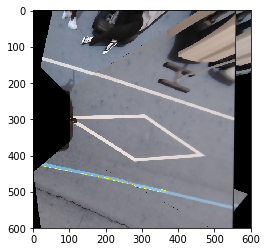

In [19]:
plt.imshow(cap)